In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid", font_scale=1.2)

In [61]:
# Diferencia de goles
df["goal_diff"] = df["home_score"] - df["away_score"]

# Resultado categórico
df["result"] = df.apply(
    lambda x: "home_win" if x["home_score"] > x["away_score"]
    else ("away_win" if x["away_score"] > x["home_score"] else "draw"),
    axis=1
)

# Ganador real
df["winner"] = df.apply(
    lambda x: x["home_team"] if x["home_score"] > x["away_score"]
    else (x["away_team"] if x["away_score"] > x["home_score"] else "Draw"),
    axis=1
)


In [62]:
X = df[["home_team", "away_team", "tournament", "neutral", "goal_diff"]]
y = df["winner"]

categoricas = ["home_team", "away_team", "tournament", "neutral"]
numericas = ["goal_diff"]

In [67]:
def predecir_ganador(home, away):
    row = pd.DataFrame([{
        "home_team": home,
        "away_team": away,
        "tournament": "FIFA World Cup",
        "neutral": True,
        "goal_diff": 0
    }])

    proba = modelo.predict_proba(row)[0]
    clases = modelo.classes_

    # Convertir a Serie para manipular mejor
    s = pd.Series(proba, index=clases)

    # Si existe Draw, lo quitamos
    if "Draw" in s.index:
        s = s.drop("Draw")

    # Ganador = clase con mayor probabilidad
    ganador = s.idxmax()

    return ganador


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo.fit(X_train, y_train)

print("Precisión del modelo:", modelo.score(X_test, y_test))

Precisión del modelo: 0.9987479131886478


In [71]:
def predecir_ganador(home, away):
    row = pd.DataFrame([{
        "home_team": home,
        "away_team": away,
        "tournament": "FIFA World Cup",
        "neutral": True,
        "goal_diff": 0
    }])

    proba = modelo.predict_proba(row)[0]
    clases = modelo.classes_

    # Convertir a Serie para manipular mejor
    s = pd.Series(proba, index=clases)

    # Quitar "Draw" si existe
    if "Draw" in s.index:
        s = s.drop("Draw")

    # Ganador = clase con mayor probabilidad
    ganador = s.idxmax()

    return ganador


/tmp/ipython-input-4090105960.py:46: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


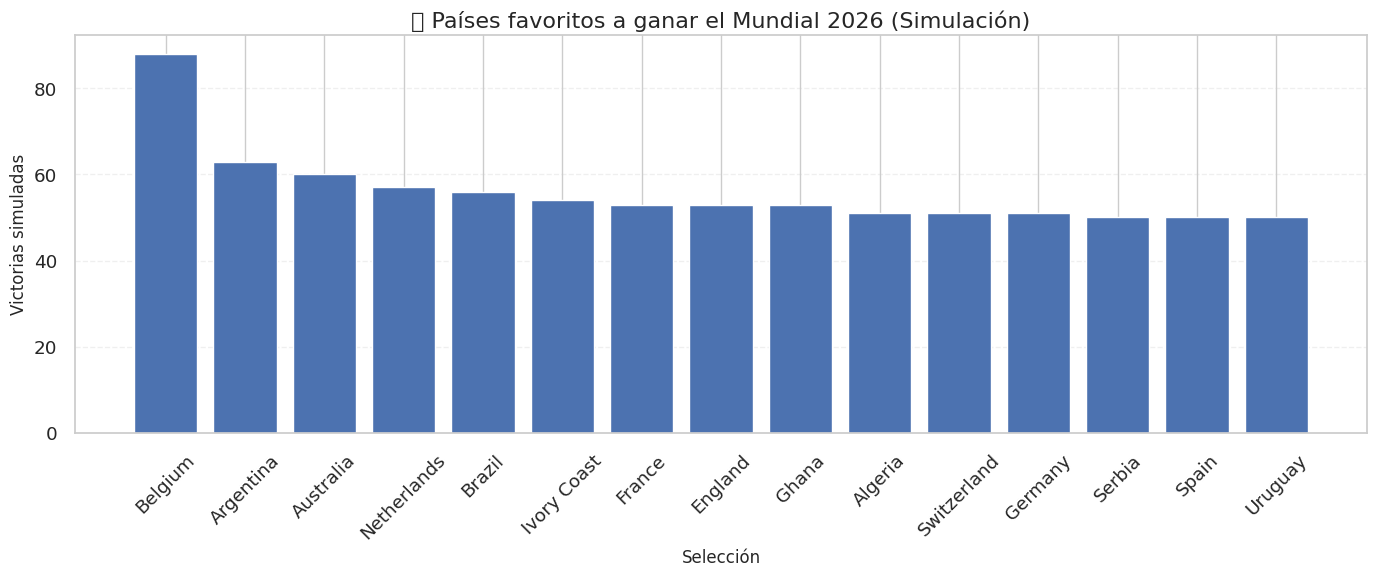

,count
Belgium,88
Argentina,63
Australia,60
Netherlands,57
Brazil,56
Ivory Coast,54
France,53
England,53
Ghana,53
Algeria,51


In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecciones ya clasificadas al Mundial 2026 (48 cupos)
equipos_mundial_2026 = [
    "Argentina", "Brazil", "Uruguay", "Colombia", "Ecuador", "Peru",
    "United States", "Mexico", "Canada",
    "Spain", "France", "Portugal", "England", "Germany", "Netherlands",
    "Belgium", "Croatia", "Switzerland", "Denmark", "Serbia",
    "Morocco", "Senegal", "Nigeria", "Egypt", "Tunisia", "Algeria",
    "Japan", "South Korea", "Iran", "Saudi Arabia", "Australia",
    "Qatar", "UAE",
    "New Zealand",
    "Cameroon", "Ghana", "Mali", "Ivory Coast", "South Africa",
    "Costa Rica", "Panama", "Jamaica",
    "Uzbekistan", "Iraq", "Oman",
    "Honduras", "El Salvador"
]

equipos = equipos_mundial_2026

resultados = []
cache = {}

# Simulación todos contra todos SOLO del mundial
for h in equipos:
    for a in equipos:
        if h != a:
            clave = (h, a)
            if clave not in cache:
                cache[clave] = predecir_ganador(h, a)
            resultados.append(cache[clave])

# Conteo de victorias
conteo = pd.Series(resultados).value_counts().head(15)

# --- Gráfico ---
plt.figure(figsize=(14,6))
plt.bar(conteo.index, conteo.values)

plt.title("🏆 Países favoritos a ganar el Mundial 2026 (Simulación)", fontsize=16)
plt.xlabel("Selección", fontsize=12)
plt.ylabel("Victorias simuladas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

plt.show()

conteo




/tmp/ipython-input-1137306808.py:27: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


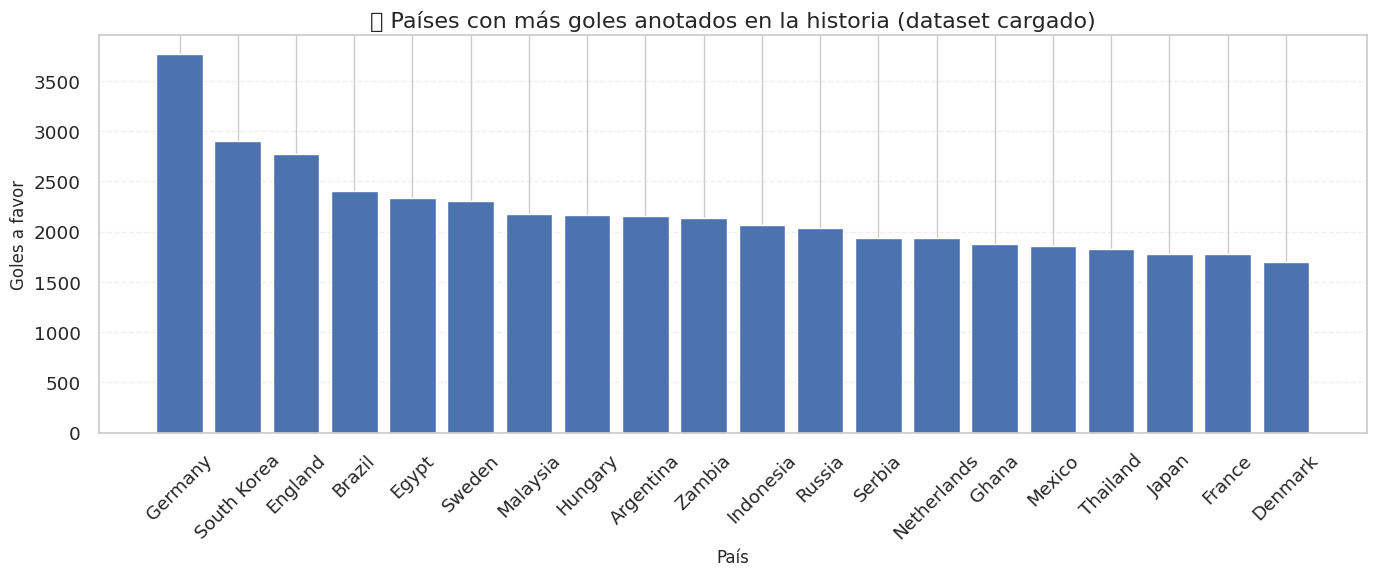

,0
Germany,3766
South Korea,2905
England,2772
Brazil,2404
Egypt,2329
Sweden,2302
Malaysia,2179
Hungary,2165
Argentina,2155
Zambia,2130


In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Goles a favor por país ---
df["goles_favor_home"] = df["home_score"]
df["goles_favor_away"] = df["away_score"]

goles_por_pais = (
    pd.concat([
        df.groupby("home_team")["goles_favor_home"].sum(),
        df.groupby("away_team")["goles_favor_away"].sum()
    ])
    .groupby(level=0).sum()
    .sort_values(ascending=False)
    .head(20)
)

# --- Gráfico ---
plt.figure(figsize=(14,6))
plt.bar(goles_por_pais.index, goles_por_pais.values)

plt.title("⚽ Países con más goles anotados en la historia (dataset cargado)", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Goles a favor", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

goles_por_pais


/tmp/ipython-input-1186120915.py:19: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


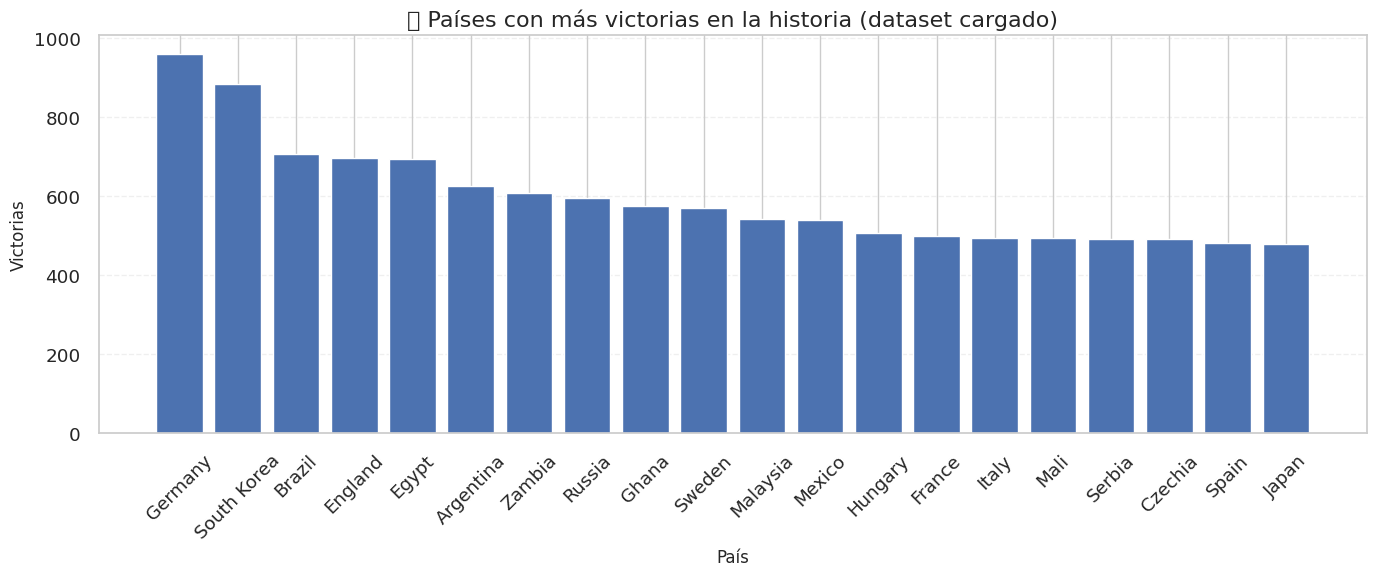

,count
winner,
Germany,960
South Korea,883
Brazil,707
England,696
Egypt,694
Argentina,625
Zambia,609
Russia,596
Ghana,576


In [79]:
# Crear columna ganador
df["winner"] = df.apply(
    lambda x: x["home_team"] if x["home_score"] > x["away_score"]
    else (x["away_team"] if x["away_score"] > x["home_score"] else "Draw"),
    axis=1
)

victorias = df[df["winner"] != "Draw"]["winner"].value_counts().head(20)

# --- Gráfico ---
plt.figure(figsize=(14,6))
plt.bar(victorias.index, victorias.values)

plt.title("🏆 Países con más victorias en la historia (dataset cargado)", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Victorias", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

victorias
